 Project: No-show appointments(original source on Kaggle)

 Introduction

This data will display patients' attendance at their appointments and the times they book appointments and what they suffer from diseases such as ,Hipertension diabetes, alcoholism and others. I will analyze these data and see if the time and illnesses they suffer from ###have a role in their attendance ofthe appointment or not.

ScheduledDay: The day the appointment was booked
AppointmentDay:Day to attend the appointment  
Neighbourhood: The hospital location 
Hipertension: People who suffer from high blood pressure
SMS_received: Did the patient receive a SMS message 
No-show: Did the patient attend the appointment, 0 means that he attended and 1 did not 

In [61]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline                    # Import libraries

UsageError: unrecognized arguments: # Import libraries


In [6]:
dataframe= pd.read_csv('Dataer.csv') # import csv file  

In [7]:
dataframe #Show (dataframe)

PatientId  AppointmentID Gender          ScheduledDay  \
0      29872499824296        5642903      F  2016-04-29T18:38:08Z   
1     558997776694438        5642503      M  2016-04-29T16:08:27Z   
2       4262962299951        5642549      F  2016-04-29T16:19:04Z   
3        867951213174        5642828      F  2016-04-29T17:29:31Z   
4       8841186448183        5642494      F  2016-04-29T16:07:23Z   
...               ...            ...    ...                   ...   
3191   95233298227946        5629133      M  2016-04-27T12:50:21Z   
3192   28393525472819        5629135      M  2016-04-27T12:50:39Z   
3193    6375629133741        5569533      F  2016-04-11T18:54:28Z   
3194    3141184995818        5569532      F  2016-04-11T18:54:21Z   
3195   22841829599625        5637312      M  2016-04-28T18:25:03Z   

            AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0     2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1     2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2     2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3     2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4     2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   
...                    ...  ...                ...          ...           ...   
3191  2016-04-29T00:00:00Z   92      SANTOS DUMONT            0             1   
3192  2016-04-29T00:00:00Z   78         VILA RUBIM            0             1   
3193  2016-04-29T00:00:00Z   38     NOVA PALESTINA            0             0   
3194  2016-04-29T00:00:00Z   68           NAZARETH            0             0   
3195  2016-04-29T00:00:00Z   75    JARDIM DA PENHA            0             1   

      Diabetes  Alcoholism Handcap  SMS_received No-show  
0            0           0       0           0.0      No  
1            0           0       0           0.0      No  
2            0           0       0           0.0      No  
3            0           0       0           0.0      No  
4            1           0       0           0.0      No  
...        ...         ...     ...           ...     ...  
3191         0           0       0           0.0     Yes  
3192         1           0       0           0.0      No  
3193         0           0       0           1.0      No  
3194         0           0       0           1.0      No  
3195         0           0       0           0.0      No  

[3196 rows x 14 columns]

Data Wrangling (Assting Data) 

In [219]:
dataframe.tail(10) # display last 10 rows

PatientId  AppointmentID Gender          ScheduledDay  \
3186  986134366933781        5629144      F  2016-04-27T12:51:25Z   
3187   45785587989624        5629140      F  2016-04-27T12:51:00Z   
3188   81641745639756        5629142      F  2016-04-27T12:51:10Z   
3189   15125569228772        5629139      F  2016-04-27T12:50:52Z   
3190   58649528961985        5629134      F  2016-04-27T12:50:29Z   
3191   95233298227946        5629133      M  2016-04-27T12:50:21Z   
3192   28393525472819        5629135      M  2016-04-27T12:50:39Z   
3193    6375629133741        5569533      F  2016-04-11T18:54:28Z   
3194    3141184995818        5569532      F  2016-04-11T18:54:21Z   
3195   22841829599625        5637312      M  2016-04-28T18:25:03Z   

            AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
3186  2016-04-29T00:00:00Z   80       MONTE BELO            0             0   
3187  2016-04-29T00:00:00Z   76     SANTA TEREZA            0             1   
3188  2016-04-29T00:00:00Z   40       MONTE BELO            0             0   
3189  2016-04-29T00:00:00Z    9       ANDORINHAS            1             0   
3190  2016-04-29T00:00:00Z   65  GRANDE VITأ…RIA            0             1   
3191  2016-04-29T00:00:00Z   92    SANTOS DUMONT            0             1   
3192  2016-04-29T00:00:00Z   78       VILA RUBIM            0             1   
3193  2016-04-29T00:00:00Z   38   NOVA PALESTINA            0             0   
3194  2016-04-29T00:00:00Z   68         NAZARETH            0             0   
3195  2016-04-29T00:00:00Z   75  JARDIM DA PENHA            0             1   

      Diabetes  Alcoholism Handcap  SMS_received No-show  
3186         0           0       0           0.0      No  
3187         1           0       0           0.0      No  
3188         1           0       0           0.0     Yes  
3189         0           0       0           0.0     Yes  
3190         1           0       0           0.0     Yes  
3191         0           0       0           0.0     Yes  
3192         1           0       0           0.0      No  
3193         0           0       0           1.0      No  
3194         0           0       0           1.0      No  
3195         0           0       0           0.0      No

In [220]:
dataframe.shape # It will return a tuple representing the dimensionality 

(3196, 14)

In [221]:
dataframe.describe() 

PatientId  AppointmentID          Age  Scholarship  Hipertension  \
count  3.196000e+03   3.196000e+03  3196.000000  3196.000000   3196.000000   
mean   1.461541e+14   5.594436e+06    35.696809     0.101377      0.189299   
std    2.559576e+14   5.980065e+04    23.107717     0.301874      0.391807   
min    2.538665e+08   5.217179e+06     0.000000     0.000000      0.000000   
25%    3.995366e+12   5.562055e+06    17.000000     0.000000      0.000000   
50%    2.736315e+13   5.625104e+06    35.000000     0.000000      0.000000   
75%    9.374083e+13   5.638428e+06    54.000000     0.000000      0.000000   
max    9.999350e+14   5.642927e+06    98.000000     1.000000      1.000000   

         Diabetes   Alcoholism  SMS_received  
count  3196.00000  3196.000000   3138.000000  
mean      0.07572     0.030976      0.392925  
std       0.26459     0.173280      0.488478  
min       0.00000     0.000000      0.000000  
25%       0.00000     0.000000      0.000000  
50%       0.00000     0.000000      0.000000  
75%       0.00000     0.000000      1.000000  
max       1.00000     1.000000      1.000000

In [222]:
dataframe.max()

PatientId              999934989273974
AppointmentID                  5642927
Gender                               M
ScheduledDay      2016-04-29T20:04:50Z
AppointmentDay    2016-04-29T00:00:00Z
Age                                 98
Neighbourhood               VILA RUBIM
Scholarship                          1
Hipertension                         1
Diabetes                             1
Alcoholism                           1
Handcap                              3
SMS_received                         1
dtype: object

In [223]:
dataframe.info() #to see details of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       3196 non-null   int64  
 1   AppointmentID   3196 non-null   int64  
 2   Gender          3196 non-null   object 
 3   ScheduledDay    3196 non-null   object 
 4   AppointmentDay  3196 non-null   object 
 5   Age             3196 non-null   int64  
 6   Neighbourhood   3196 non-null   object 
 7   Scholarship     3196 non-null   int64  
 8   Hipertension    3196 non-null   int64  
 9   Diabetes        3196 non-null   int64  
 10  Alcoholism      3196 non-null   int64  
 11  Handcap         3196 non-null   object 
 12  SMS_received    3138 non-null   float64
 13  No-show         3138 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 349.7+ KB


In [283]:
dataframe.head(30) # Display thirty first row

PatientId  AppointmentID Gender          ScheduledDay  \
0    29872499824296        5642903      F  2016-04-29T18:38:08Z   
1   558997776694438        5642503      M  2016-04-29T16:08:27Z   
2     4262962299951        5642549      F  2016-04-29T16:19:04Z   
3      867951213174        5642828      F  2016-04-29T17:29:31Z   
4     8841186448183        5642494      F  2016-04-29T16:07:23Z   
5    95985133231274        5626772      F  2016-04-27T08:36:51Z   
6   733688164476661        5630279      F  2016-04-27T15:05:12Z   
7     3449833394123        5630575      F  2016-04-27T15:39:58Z   
8    56394729949972        5638447      F  2016-04-29T08:02:16Z   
9    78124564369297        5629123      F  2016-04-27T12:48:25Z   
10  734536231958495        5630213      F  2016-04-27T14:58:11Z   
11    7542951368435        5620163      M  2016-04-26T08:44:12Z   
12  566654781423437        5634718      F  2016-04-28T11:33:51Z   
13  911394617215919        5636249      M  2016-04-28T14:52:07Z   
14   99884723334928        5633951      F  2016-04-28T10:06:24Z   
15      99948393975        5620206      F  2016-04-26T08:47:27Z   
16   84574392942817        5633121      M  2016-04-28T08:51:47Z   
17   14794966191172        5633460      F  2016-04-28T09:28:57Z   
18   17135378245248        5621836      F  2016-04-26T10:54:18Z   
19    7223289184215        5640433      F  2016-04-29T10:43:14Z   
20  622257462899397        5626083      F  2016-04-27T07:51:14Z   
21   12154843752835        5628338      F  2016-04-27T10:50:45Z   
22  863229818887631        5616091      M  2016-04-25T13:29:16Z   
23  213753979425692        5634142      F  2016-04-28T10:27:05Z   
24    8734857996885        5641780      F  2016-04-29T14:19:19Z   
25    5819369978796        5624020      M  2016-04-26T15:04:17Z   
26      25787851512        5641781      F  2016-04-29T14:19:42Z   
27   12154843752835        5628345      F  2016-04-27T10:51:45Z   
28    5926171692527        5642400      M  2016-04-29T15:48:02Z   
29    1225776163665        5642186      F  2016-04-29T15:16:29Z   

          AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0   2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1   2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2   2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3   2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4   2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   
5   2016-04-29T00:00:00Z   76         REPأöBLICA            0             1   
6   2016-04-29T00:00:00Z   23         GOIABEIRAS            0             0   
7   2016-04-29T00:00:00Z   39         GOIABEIRAS            0             0   
8   2016-04-29T00:00:00Z   21         ANDORINHAS            0             0   
9   2016-04-29T00:00:00Z   19          CONQUISTA            0             0   
10  2016-04-29T00:00:00Z   30     NOVA PALESTINA            0             0   
11  2016-04-29T00:00:00Z   29     NOVA PALESTINA            0             0   
12  2016-04-29T00:00:00Z   22     NOVA PALESTINA            1             0   
13  2016-04-29T00:00:00Z   28     NOVA PALESTINA            0             0   
14  2016-04-29T00:00:00Z   54     NOVA PALESTINA            0             0   
15  2016-04-29T00:00:00Z   15     NOVA PALESTINA            0             0   
16  2016-04-29T00:00:00Z   50     NOVA PALESTINA            0             0   
17  2016-04-29T00:00:00Z   40          CONQUISTA            1             0   
18  2016-04-29T00:00:00Z   30     NOVA PALESTINA            1             0   
19  2016-04-29T00:00:00Z   46           DA PENHA            0             0   
20  2016-04-29T00:00:00Z   30     NOVA PALESTINA            0             0   
21  2016-04-29T00:00:00Z    4          CONQUISTA            0             0   
22  2016-04-29T00:00:00Z   13          CONQUISTA            0             0   
23  2016-04-29T00:00:00Z   46       

Data Wrangling (Data Cleanning )

1) We start from the beginning by looking at column name :  

In [10]:
dataframe.rename(columns = {'Hipertension': 'Hypertension'}, inplace = True) 
dataframe.rename(columns = {'Handcap': 'Handicap'}, inplace = True)
dataframe.rename(columns = {'No-show': 'Noshow'}, inplace = True)

# I rename the colmans 

In [392]:
print(dataframe.columns) #Display column names

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Noshow'],
      dtype='object')


2) there are duplicate values? 

In [228]:
sum(dataframe.duplicated()) # there are not duplicat data (clean)

0

3) Clening Data by Remove typos: 

In [447]:
dataframe.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       3196 non-null   int64  
 1   AppointmentID   3196 non-null   int64  
 2   Gender          3196 non-null   object 
 3   ScheduledDay    3196 non-null   object 
 4   AppointmentDay  3196 non-null   object 
 5   Age             3196 non-null   int64  
 6   Neighbourhood   3196 non-null   object 
 7   Scholarship     3196 non-null   int64  
 8   Hypertension    3196 non-null   int64  
 9   Diabetes        3196 non-null   int64  
 10  Alcoholism      3196 non-null   int64  
 11  Handicap        3196 non-null   int64  
 12  SMS_received    3196 non-null   int64  
 13  Noshow          3196 non-null   float64
dtypes: float64(1), int64(9), object(4)
memory usage: 349.7+ KB


In [287]:
#dataframe

Solve the  Missing Data problem : 

In [14]:
mean = dataframe['SMS_received'].mean()
dataframe['SMS_received'].fillna(mean, inplace=True) # there is missing data in SMS colman , i take the average to fill the missing data 
dataframe['SMS_received'] = dataframe['SMS_received'].astype('int')

In [15]:
dataframe['SMS_received'] = dataframe['SMS_received'].astype('int') #Changed columan type to int 

In [56]:

dataframe['Noshow'].replace({'No':0,'Yes':1},inplace=True)# I replaced words with letters to make it easier for me to work with this data

In [17]:
mean = dataframe['Noshow'].mean()
dataframe['Noshow'].fillna(mean, inplace=True) 

In [18]:
dataframe['Handicap'] = dataframe['Handicap'].replace(['0،No'],'0') #  I replace one value with another value (clean)

In [57]:
dataframe['Handicap'] = dataframe['Handicap'].replace(['0،Yes'],'0')

In [20]:
dataframe['Handicap'] = dataframe['Handicap'].replace(['1،No'],'1')

In [21]:
dataframe['Handicap'] = dataframe['Handicap'].replace(['1،Yes'],'1')

In [58]:
dataframe['Handicap'] = dataframe['Handicap'].astype('int')

In [44]:
dataframe['Noshow'] = dataframe['Noshow'].astype('int')

In [45]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AppointmentID   3196 non-null   int64 
 1   Gender          3196 non-null   object
 2   ScheduledDay    3196 non-null   object
 3   AppointmentDay  3196 non-null   object
 4   Age             3196 non-null   int64 
 5   Neighbourhood   3196 non-null   object
 6   Scholarship     3196 non-null   int64 
 7   Hypertension    3196 non-null   int64 
 8   Diabetes        3196 non-null   int64 
 9   Alcoholism      3196 non-null   int64 
 10  Handicap        3196 non-null   object
 11  SMS_received    3196 non-null   int64 
 12  Noshow          3196 non-null   int64 
dtypes: int64(8), object(5)
memory usage: 324.7+ KB


In [46]:
dataframe

4) Delete unimportant columns: 

In [59]:
dataframe.drop(columns='PatientId', inplace=True) # I deleted the column that I don't need

In [48]:
dataframe['Alcoholism'].value_counts() #I use count to make sure the data is clean

0    3097
1      99
Name: Alcoholism, dtype: int64

In [49]:
dataframe['SMS_received'].value_counts() #I use count to make sure the data is clean

0    1963
1    1233
Name: SMS_received, dtype: int64

In [50]:
dataframe['Noshow'].value_counts() #I use count to make sure the data is clean

0    2584
1     612
Name: Noshow, dtype: int64

In [51]:
dataframe['Scholarship'].value_counts() #I use count to make sure the data is clean


0    2872
1     324
Name: Scholarship, dtype: int64

In [52]:
dataframe['Diabetes'].value_counts() #I use count to make sure the data is clean

0    2954
1     242
Name: Diabetes, dtype: int64

In [60]:
dataframe['Handicap'].value_counts() #I use count to make sure the data is clean

0    3110
1      78
2       7
3       1
Name: Handicap, dtype: int64

In [33]:
dataframe['Hypertension'].value_counts() #I use count to make sure the data is clean

0    2591
1     605
Name: Hypertension, dtype: int64

 Exiploring Data 

In [34]:
dataframe.hist(figsize=(8,8));

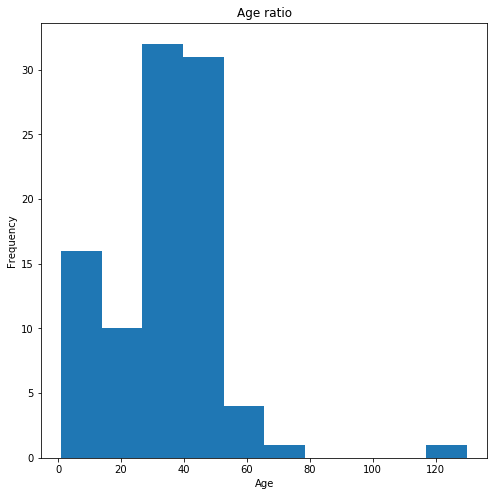

In [35]:
dataframe['Age'].value_counts().plot(kind='hist', figsize=(8,8));
plt.xlabel('Age');
plt.title("Age ratio") ;
#Display the ages ratio

1) Patient attendance rate for appointments

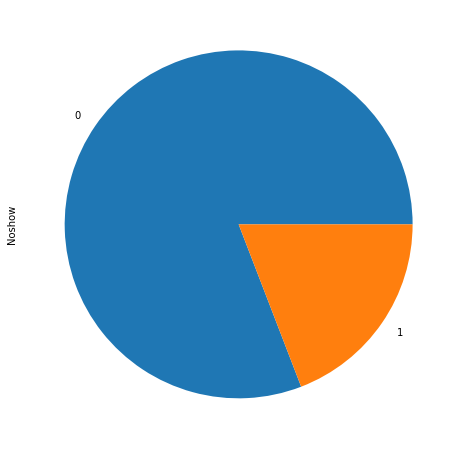

In [36]:
dataframe['Noshow'].value_counts().plot(kind='pie',figsize=(8,8)); #Patient attendance rate for appointments

2) Are the Scholarship holders committed to attend their appointments?

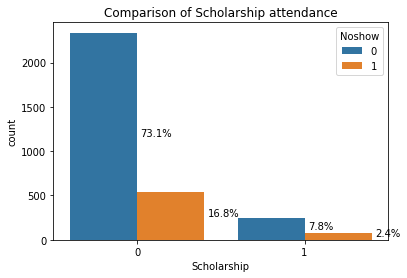

In [37]:

Sch_No = sns.countplot(data=dataframe ,x=dataframe.Scholarship, hue=dataframe.Noshow)
plt.title('Comparison of Scholarship attendance')
total = len(dataframe['Scholarship'])
for p in Sch_No.patches:
        percentage = '{:.1f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        Sch_No.annotate(percentage, (x, y))
        
plt.show() 

#I count Scholarship column with Noshow and displayed it as a percentage

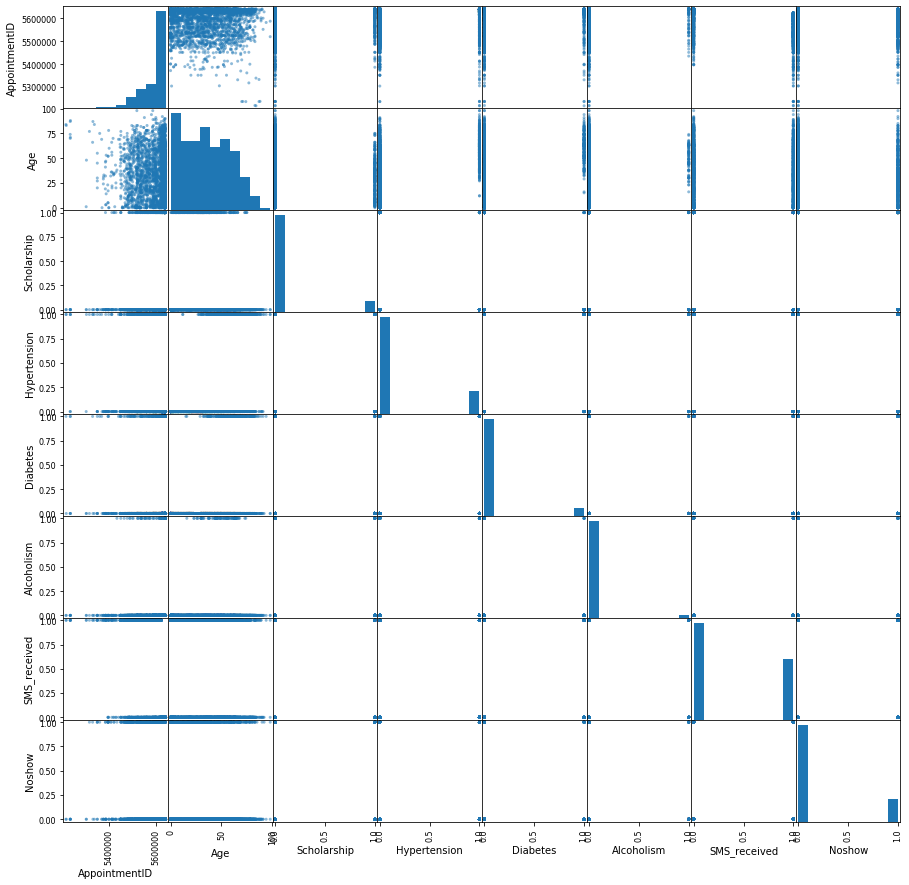

In [38]:
pd.plotting.scatter_matrix(dataframe,figsize=(15,15)); # Determine the relationship of each column with itself and with other columns

3) Does sending SMS messages have an effective role in attending patients for appointments?

In [39]:

SMS_No= sns.countplot(x=dataframe.SMS_received, hue=dataframe.Noshow, data=dataframe)
plt.title("Sending SMS messages and their relationship to attending the appointment")

for p in SMS_No.patches:
        percentage = '{:.1f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        SMS_No.annotate(percentage, (x, y))
        
plt.show() 
#I count SMS_received column with Noshow and displayed it as a percentage

4) Are diabetics obligated to attend their appointments Compared with hypertensive patients ? 

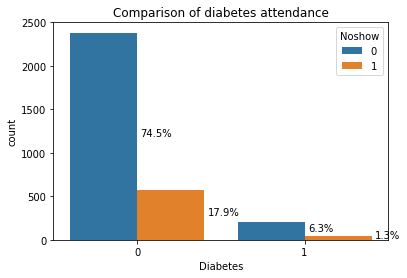

In [40]:

Di_No = sns.countplot(data=dataframe ,x=dataframe.Diabetes, hue=dataframe.Noshow)
plt.title('Comparison of diabetes attendance')
for p in Di_No.patches:
        percentage = '{:.1f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        Di_No.annotate(percentage, (x, y))
        
plt.show()

#I count Diabetes column with Noshow and displayed it as a percentage


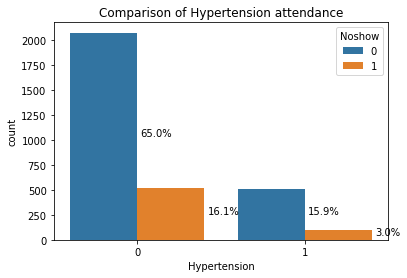

In [41]:
Hy_No= sns.countplot(data=dataframe ,x=dataframe.Hypertension, hue=dataframe.Noshow)
plt.title('Comparison of Hypertension attendance')
for p in Hy_No.patches:
        percentage = '{:.1f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        Hy_No.annotate(percentage, (x, y))
        
        
plt.show() 

Conclusions

Initially, I tried to understand this data, but I couldn't because it was too much, and this is the goal of this project, and these were the stages I took
1	Data Wrangling (Data Cleaning) 
2	Exploratory Data Analysis

Some of the problems that I encountered during my work on the project: 
1 I had a problem in uploading the csv file because its size is big, so I took a sample of this data 

2 I had a problem with data interference so I used replace to solve it

3 I had a problem to adding percentages in the chart as it was showing zeros result, and then I discovered that the error was in height and width

Results:
1)	Are the Scholarship holders committed to attend their appointments?
(Scholarships) 
•	Based on the graph, the percentage of patients who did not have scholarships and attended their appointments 73 % and those who did not attend 16.8 %
•	Based on the graph, the percentage of patients who have scholarships and attended their appointments 7.8% and those who did not attend 2.4%
•	 My deductive: Patients who have scholarships are not obligated to attend their appointments compared to those who do not have scholarships

2)	Does sending SMS messages have an effective role in attending patients for appointments? 
•	 Based on the graph, the percentage of patients who did not receiving SMS message and attended their appointments 52.2% % and those who did not attend 9.2 %
•	Based on the graph, the percentage of patients who received SMS message and attended their appointments 28.6 % and those who did not attend 9.9%
•	My deductive: Most patients remember their appointments without SMS messages, but the percentage of people who attend their appointments and have received SMS messages is also high, and this indicates the importance of sending appointment reminders.

3)	 Are diabetics obligated to attend their appointments Compared with hypertensive patients? 
(Diabetics) 
•	Based on the graph, the percentage of patients who they don't have diabetes and attended their appointments 74.5% and those who did not attend 17.9 %
•	 Based on the graph, the percentage of patients who have diabetes and attended their appointments 6.3% and those who did not attend 1.3%
(Hypertension) 
•	Based on the graph, the percentage of patients who they don't have hypertension and attended their appointments 65.0% and those who did not attend 16.1%
•	Based on the graph, the percentage of patients who have hypertension and attended their appointments 15.9% and those who did not attend 3.0%
•	My deductive: Diabetics are more committed to attending their appointments than hypertensive patients , Although the proportion of people suffering Hypertension than people with diabetes , Diabetes: 242 , Hypertension: 605 




In [252]:
dataframe.groupby('Hypertension')